Solving Burgess Equation coparing Lax Wendroff vs Upwind for various initial solutions

Lax Wendroff Method

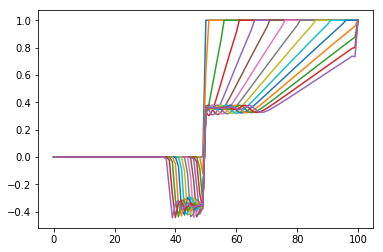

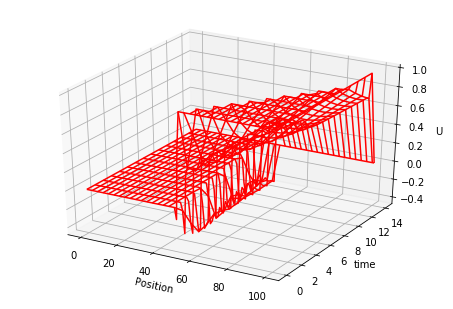

beta 1.0 , dt 1.0


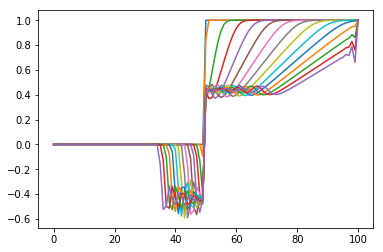

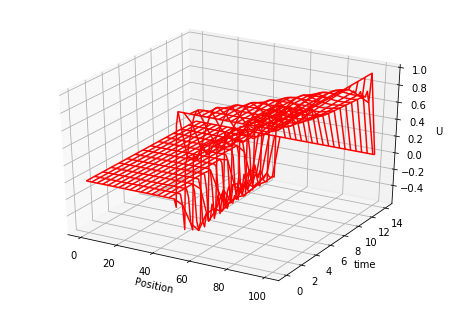

beta 0.5 , dt 0.5


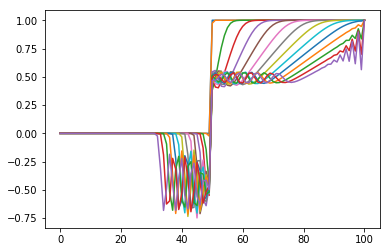

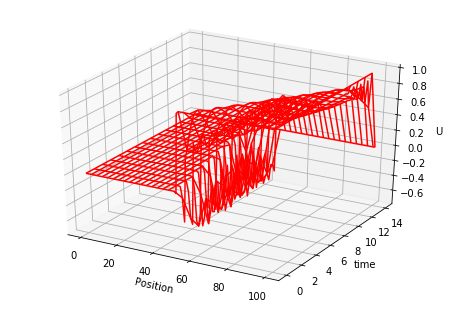

beta 0.1 , dt 0.1


In [8]:
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

for c in [1,0.5,0.1]:
    L=100.; Nx=101; 
    tend=70.; vel=1.; Dtout=5.

    dx=L/(Nx-1)
    dt=c*dx/vel
    epsilon = 1.
    beta = epsilon*dt/dx

    x=np.arange(0,Nx-1,dx)


    U=np.zeros((Nx,2), float)
    Up = np.zeros((Nx,int(tend/Dtout)+1),float) 




#     for i in range(1,Nx-1):
#           U[i,0] = np.sin(i*np.pi/L)


    for i in range(int((Nx-1)/2)):
        U[i,0]=0.0
        U[i,1]=0.0

    for i in range(int((Nx-1)/2), Nx):
        U[i,0]=1.0
        U[i,1]=1.0
#     for i in range(Nx):
#         if  dx*i/10.<1:
#             U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
#             U[i,1]=U[i,0]
#         else:
#             U[i,0]=1.0
#             U[i,1]=U[i,0]

    toutn=0
    t=0.
    p.plot(U[:,0])
    failed = False
    while t < tend:                                  
        for ix in range (1, Nx - 1):   
            U[ix, 1] = (U[ix,0]-(beta/4.)*(U[ix+1,0]**2-U[ix-1,0]**2)
            +(beta**2/8.)*((U[ix+1,0]+U[ix,0])*(U[ix+1,0]**2-U[ix,0]**2) 
                           - (U[ix,0]+U[ix-1,0])*(U[ix,0]**2-U[ix-1,0]**2)))
            if np.isnan(U[ix,1]):
                failed= True
        if failed:break
        if t >= toutn*Dtout: 
            p.plot(U[:,1])
            Up[:,toutn] = U[:,1]   
            #print(toutn)   
            toutn += 1                        
        for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1]
        #U[:,0] = U[:,1]
        t+=dt

    x = list(range(0, Nx))                       # Plot alternate pts
    y = list(range(0, int(tend/Dtout)+1))                      

    X, Y = p.meshgrid(x, y) 


    def functz(Tpl):                            
        z = Tpl[X, Y]       
        return z

    Z = functz(Up)              


    fig = p.figure()                                          # Create figure


    ax = Axes3D(fig)                                              
    ax.plot_wireframe(X, Y, Z, color = 'r')                    
    ax.set_xlabel('Position')                                     
    ax.set_ylabel('time')
    ax.set_zlabel('U')
    p.show()                               
    print("beta",beta,", dt",dt)
    if failed:
        print("failed at",t)

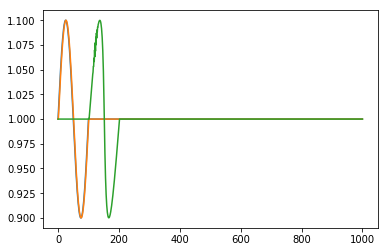

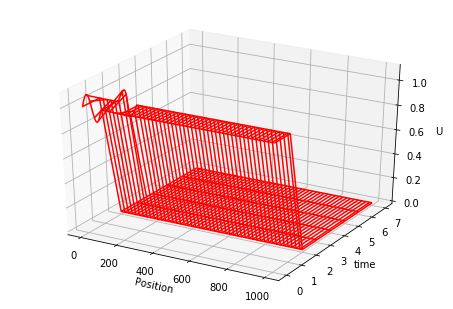

beta 1.0 , dt 0.1
failed at 12.89999999999997


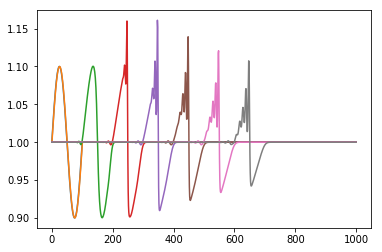

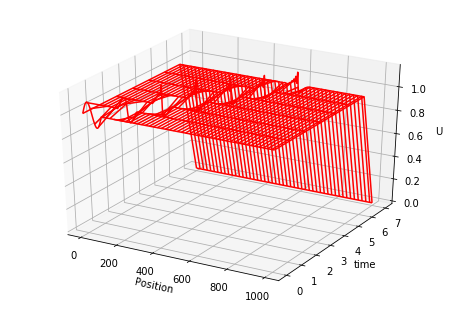

beta 0.5 , dt 0.05


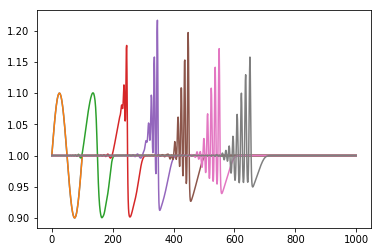

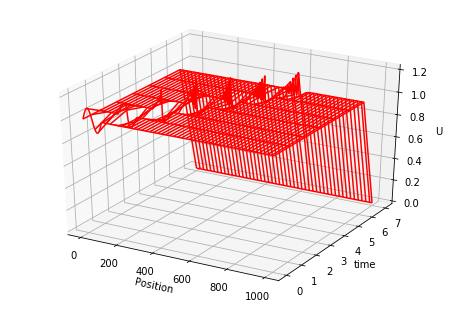

beta 0.10000000000000002 , dt 0.010000000000000002


In [2]:
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

for c in [1,0.5,0.1]:
    L=100.; Nx=1001; 
    tend=70.; vel=1.; Dtout=10.

    dx=L/(Nx-1)
    dt=c*dx/vel
    epsilon = 1.
    beta = epsilon*dt/dx

    x=np.arange(0,Nx-1,dx)


    U=np.zeros((Nx,2), float)
    Up = np.zeros((Nx,int(tend/Dtout)+1),float) 




#     for i in range(1,Nx-1):
#           U[i,0] = np.sin(i*np.pi/L)


#     for i in range(int((Nx-1)/2)):
#         U[i,0]=0.0
#         U[i,1]=0.0

#     for i in range(int((Nx-1)/2), Nx):
#         U[i,0]=1.0
#         U[i,1]=1.0
    for i in range(Nx):
        if  dx*i/10.<1:
            U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
            U[i,1]=U[i,0]
        else:
            U[i,0]=1.0
            U[i,1]=U[i,0]

    toutn=0
    t=0.
    p.plot(U[:,0])
    failed = False
    while t < tend:                                  
        for ix in range (1, Nx - 1):   
             U[ix, 1] = (U[ix,0]-(beta/4.)*(U[ix+1,0]**2-U[ix-1,0]**2)
                        +(beta**2/8.)*((U[ix+1,0]+U[ix,0])*(U[ix+1,0]**2-U[ix,0]**2) 
                        -(U[ix,0]+U[ix-1,0])*(U[ix,0]**2-U[ix-1,0]**2)))
             if np.isnan(U[ix,1]):
                failed= True
        if failed:break
        if t >= toutn*Dtout: 
            p.plot(U[:,1])
            Up[:,toutn] = U[:,1]   
            #print(toutn)   
            toutn += 1                        
        for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1]
        #U[:,0] = U[:,1]
        t+=dt

    x = list(range(0, Nx))                       # Plot alternate pts
    y = list(range(0, int(tend/Dtout)+1))                      

    X, Y = p.meshgrid(x, y) 


    def functz(Tpl):                            
        z = Tpl[X, Y]       
        return z

    Z = functz(Up)              


    fig = p.figure()                                          # Create figure


    ax = Axes3D(fig)                                              
    ax.plot_wireframe(X, Y, Z, color = 'r')                    
    ax.set_xlabel('Position')                                     
    ax.set_ylabel('time')
    ax.set_zlabel('U')
    p.show()                               
    print("beta",beta,", dt",dt)
    if failed:
        print("failed at",t)

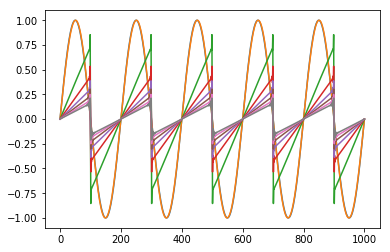

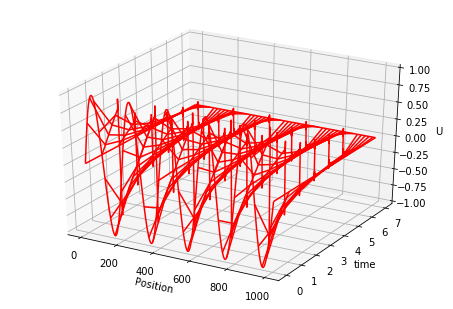

beta 1.0 , dt 0.1


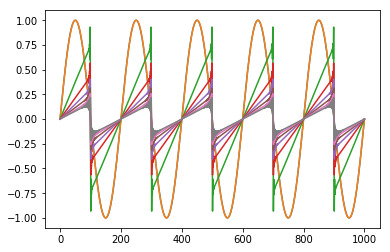

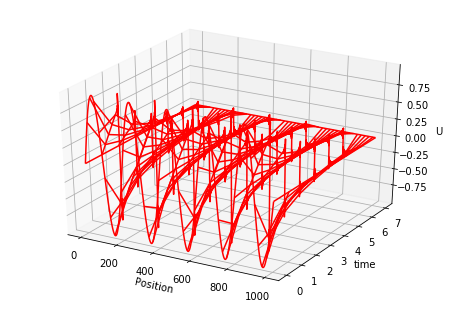

beta 0.5 , dt 0.05


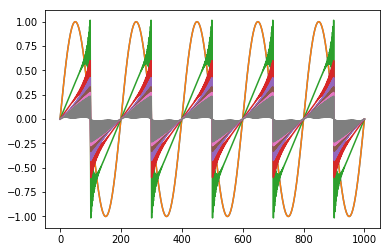

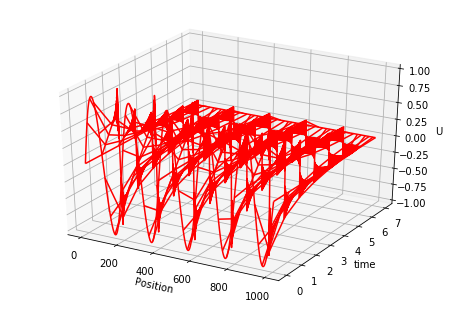

beta 0.10000000000000002 , dt 0.010000000000000002


In [5]:
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

for c in [1,0.5,0.1]:
    L=100.; Nx=1001; 
    tend=70.; vel=1.; Dtout=10.

    dx=L/(Nx-1)
    dt=c*dx/vel
    epsilon = 1.
    beta = epsilon*dt/dx

    x=np.arange(0,Nx-1,dx)


    U=np.zeros((Nx,2), float)
    Up = np.zeros((Nx,int(tend/Dtout)+1),float) 




    for i in range(1,Nx-1):
          U[i,0] = np.sin(i*np.pi/L)


#     for i in range(int((Nx-1)/2)):
#         U[i,0]=0.0
#         U[i,1]=0.0

#     for i in range(int((Nx-1)/2), Nx):
#         U[i,0]=1.0
#         U[i,1]=1.0
#     for i in range(Nx):
#         if  dx*i/10.<1:
#             U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
#             U[i,1]=U[i,0]
#         else:
#             U[i,0]=1.0
#             U[i,1]=U[i,0]

    toutn=0
    t=0.
    p.plot(U[:,0])
    failed = False
    while t < tend:                                  
        for ix in range (1, Nx - 1):   
             U[ix, 1] = (U[ix,0]-(beta/4.)*(U[ix+1,0]**2-U[ix-1,0]**2)
                        +(beta**2/8.)*((U[ix+1,0]+U[ix,0])*(U[ix+1,0]**2-U[ix,0]**2) 
                        -(U[ix,0]+U[ix-1,0])*(U[ix,0]**2-U[ix-1,0]**2)))
             if np.isnan(U[ix,1]):
                failed= True
        if failed:break
        if t >= toutn*Dtout: 
            p.plot(U[:,1])
            Up[:,toutn] = U[:,1]   
            #print(toutn)   
            toutn += 1                        
        for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1]
        #U[:,0] = U[:,1]
        t+=dt

    x = list(range(0, Nx))                       # Plot alternate pts
    y = list(range(0, int(tend/Dtout)+1))                      

    X, Y = p.meshgrid(x, y) 


    def functz(Tpl):                            
        z = Tpl[X, Y]       
        return z

    Z = functz(Up)              


    fig = p.figure()                                          # Create figure


    ax = Axes3D(fig)                                              
    ax.plot_wireframe(X, Y, Z, color = 'r')                    
    ax.set_xlabel('Position')                                     
    ax.set_ylabel('time')
    ax.set_zlabel('U')
    p.show()                               
    print("beta",beta,", dt",dt)
    if failed:
        print("failed at",t)

Upwind Method

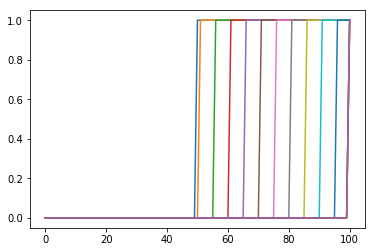

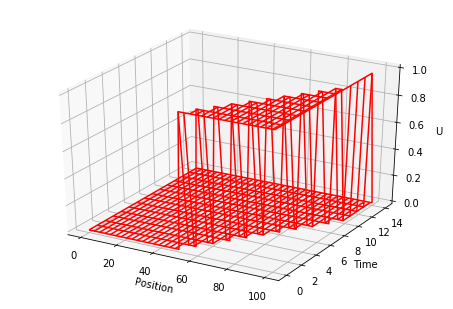

beta 1.0 , dt 1.0


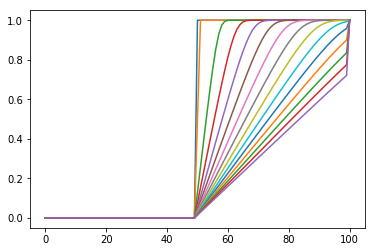

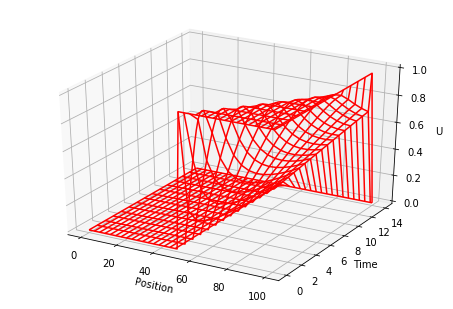

beta 0.5 , dt 0.5


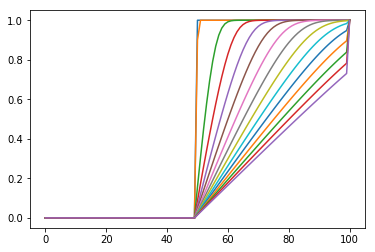

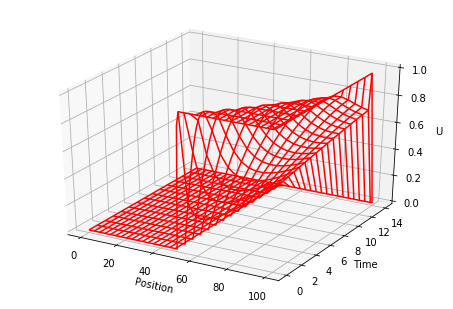

beta 0.1 , dt 0.1


In [7]:
# Upwind method
%matplotlib inline
import numpy as np
from vpython import *
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 


for c in [1,0.5,0.1]:

    L=100.; Nx=101; 
    tend=70.; vel=1.; Dtout=5.

    dx=L/(Nx-1)
    dt=c*dx/vel
    epsilon = 1.
    beta = epsilon*dt/dx

    x=np.arange(0,Nx-1,dx)


    U=np.zeros((Nx,2), float)
    Up = np.zeros((Nx,int(tend/Dtout)+1),float) 
#     for i in range(Nx):
#         #x[i]=i*dx
#         if  dx*i/10.<1:
#             U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
#             U[i,1]=U[i,0]
#         else:
#             U[i,0]=1.0
#             U[i,1]=U[i,0]



#     for i in range(1,Nx-1):
#           U[i,0] = np.sin(i*np.pi/L)


    for i in range(int((Nx-1)/2)):
        U[i,0]=0.0
        U[i,1]=0.0

    for i in range(int((Nx-1)/2), Nx):
        U[i,0]=1.0
        U[i,1]=1.0


    toutn=0
    t=0.
    p.plot(U[:,0])
    failed = False
    while t < tend:                                  
        for ix in range (1, Nx - 1):
                if U[ix,0] > 0 :
                    U[ix,1] = U[ix,0] - (beta*U[ix,0])*(U[ix,0]-U[ix-1,0])
                else:
                    U[ix,1] = U[ix,0] - (beta*U[ix,0])*(U[ix+1,0]-U[ix,0])
        if failed:break
        if t >= toutn*Dtout: 
            p.plot(U[:,1])
            Up[:,toutn] = U[:,1]    
            toutn += 1                        
        for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1]
        #U[:,0] = U[:,1]
        t+=dt



    x = list(range(0, Nx))                       # Plot alternate pts
    y = list(range(0, int(tend/Dtout)+1))                      

    X, Y = p.meshgrid(x, y) 


    def functz(Tpl):                            
        z = Tpl[X, Y]       
        return z

    Z = functz(Up)              


    fig = p.figure()                                          # Create figure


    ax = Axes3D(fig)                                              
    ax.plot_wireframe(X, Y, Z, color = 'r')                    
    ax.set_xlabel('Position')                                     
    ax.set_ylabel('Time')
    ax.set_zlabel('U')
    p.show() 
    print("beta",beta,", dt",dt)
    if failed:
        print("failed at",t)

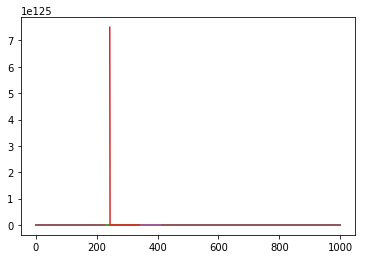

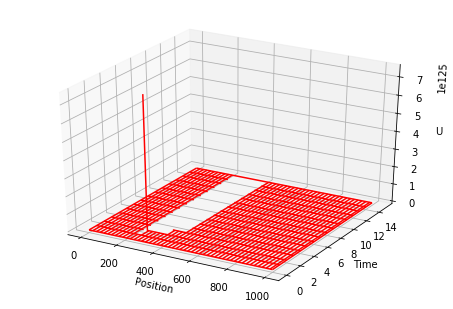

beta 1.0 , dt 0.1


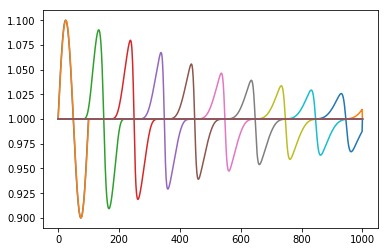

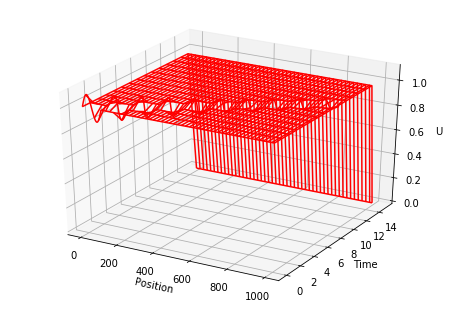

beta 0.5 , dt 0.05


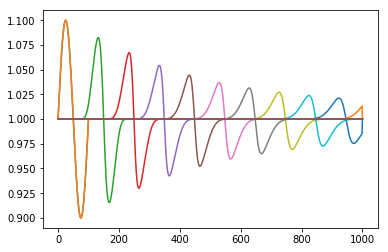

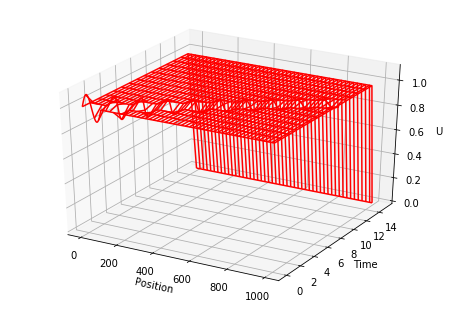

beta 0.10000000000000002 , dt 0.010000000000000002


In [4]:
# Upwind method
%matplotlib inline
import numpy as np
from vpython import *
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 


for c in [1,0.5,0.1]:

    L=100.; Nx=1001; 
    tend=150.; vel=1.; Dtout=10.

    dx=L/(Nx-1)
    dt=c*dx/vel
    epsilon = 1.
    beta = epsilon*dt/dx

    x=np.arange(0,Nx-1,dx)


    U=np.zeros((Nx,2), float)
    Up = np.zeros((Nx,int(tend/Dtout)+1),float) 
    for i in range(Nx):
        #x[i]=i*dx
        if  dx*i/10.<1:
            U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
            U[i,1]=U[i,0]
        else:
            U[i,0]=1.0
            U[i,1]=U[i,0]



#     for i in range(1,Nx-1):
#           U[i,0] = np.sin(i*np.pi/L)


#     for i in range(int((Nx-1)/2)):
#         U[i,0]=0.0
#         U[i,1]=0.0

#     for i in range(int((Nx-1)/2), Nx):
#         U[i,0]=1.0
#         U[i,1]=1.0


    toutn=0
    t=0.
    p.plot(U[:,0])
    failed = False
    while t < tend:                                  
        for ix in range (1, Nx - 1):
                if U[ix,0] > 0 :
                    U[ix,1] = U[ix,0] - (beta*U[ix,0])*(U[ix,0]-U[ix-1,0])
                else:
                    U[ix,1] = U[ix,0] - (beta*U[ix,0])*(U[ix+1,0]-U[ix,0])
        if failed:break
        if t >= toutn*Dtout: 
            p.plot(U[:,1])
            Up[:,toutn] = U[:,1]    
            toutn += 1                        
        for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1]
        #U[:,0] = U[:,1]
        t+=dt



    x = list(range(0, Nx))                       # Plot alternate pts
    y = list(range(0, int(tend/Dtout)+1))                      

    X, Y = p.meshgrid(x, y) 


    def functz(Tpl):                            
        z = Tpl[X, Y]       
        return z

    Z = functz(Up)              


    fig = p.figure()                                          # Create figure


    ax = Axes3D(fig)                                              
    ax.plot_wireframe(X, Y, Z, color = 'r')                    
    ax.set_xlabel('Position')                                     
    ax.set_ylabel('Time')
    ax.set_zlabel('U')
    p.show() 
    print("beta",beta,", dt",dt)
    if failed:
        print("failed at",t)

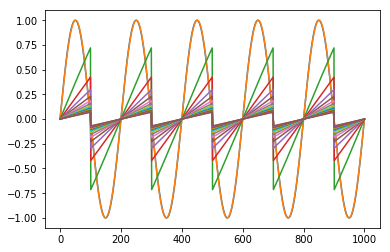

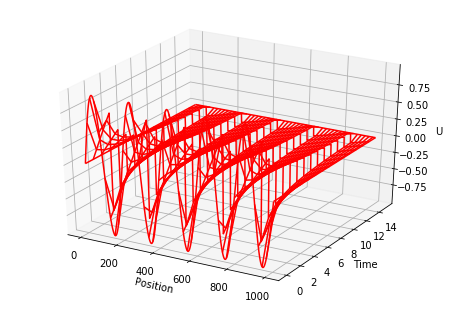

beta 1.0 , dt 0.1


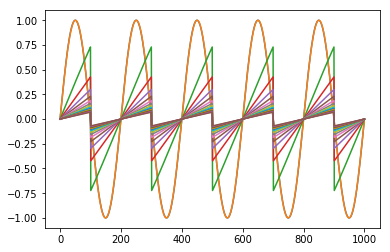

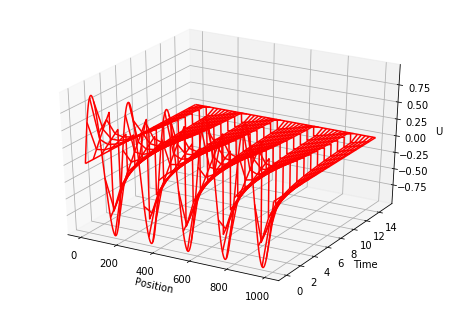

beta 0.5 , dt 0.05


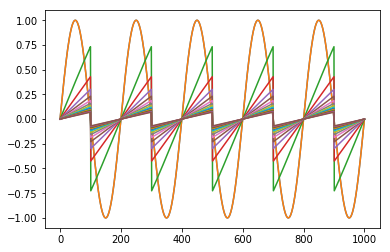

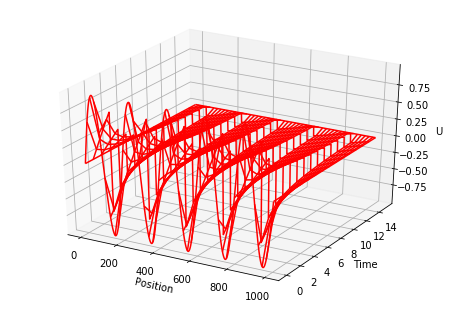

beta 0.10000000000000002 , dt 0.010000000000000002


In [6]:
# Upwind method
%matplotlib inline
import numpy as np
from vpython import *
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 


for c in [1,0.5,0.1]:

    L=100.; Nx=1001; 
    tend=150.; vel=1.; Dtout=10.

    dx=L/(Nx-1)
    dt=c*dx/vel
    epsilon = 1.
    beta = epsilon*dt/dx

    x=np.arange(0,Nx-1,dx)


    U=np.zeros((Nx,2), float)
    Up = np.zeros((Nx,int(tend/Dtout)+1),float) 
#     for i in range(Nx):
#         #x[i]=i*dx
#         if  dx*i/10.<1:
#             U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
#             U[i,1]=U[i,0]
#         else:
#             U[i,0]=1.0
#             U[i,1]=U[i,0]



    for i in range(1,Nx-1):
          U[i,0] = np.sin(i*np.pi/L)


#     for i in range(int((Nx-1)/2)):
#         U[i,0]=0.0
#         U[i,1]=0.0

#     for i in range(int((Nx-1)/2), Nx):
#         U[i,0]=1.0
#         U[i,1]=1.0


    toutn=0
    t=0.
    p.plot(U[:,0])
    failed = False
    while t < tend:                                  
        for ix in range (1, Nx - 1):
                if U[ix,0] > 0 :
                    U[ix,1] = U[ix,0] - (beta*U[ix,0])*(U[ix,0]-U[ix-1,0])
                else:
                    U[ix,1] = U[ix,0] - (beta*U[ix,0])*(U[ix+1,0]-U[ix,0])
        if failed:break
        if t >= toutn*Dtout: 
            p.plot(U[:,1])
            Up[:,toutn] = U[:,1]    
            toutn += 1                        
        for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1]
        #U[:,0] = U[:,1]
        t+=dt



    x = list(range(0, Nx))                       # Plot alternate pts
    y = list(range(0, int(tend/Dtout)+1))                      

    X, Y = p.meshgrid(x, y) 


    def functz(Tpl):                            
        z = Tpl[X, Y]       
        return z

    Z = functz(Up)              


    fig = p.figure()                                          # Create figure


    ax = Axes3D(fig)                                              
    ax.plot_wireframe(X, Y, Z, color = 'r')                    
    ax.set_xlabel('Position')                                     
    ax.set_ylabel('Time')
    ax.set_zlabel('U')
    p.show() 
    print("beta",beta,", dt",dt)
    if failed:
        print("failed at",t)

In general lower dt means more accurate results.

The Lax Wendroff method gives more accurate results as it is second order equation, however shockwaves causes ripple effects as compared to upwind.

